In this tutorial, we will explore how to load instance annotated volume cubes in Python.

These cubes are created as labels for the training of volumetric segmentation approaches.
We hope that they will enable machine learning-based models that, even if they don't entirely solve segmentation on their own, perform instance segmentation as a critical first step before the instances are then stitched together into larger sheets!

### Getting Started:
First, we need to install and import `vesuvius`, which will help us quickly fetch the cube data from the repository.

In [ ]:
!pip install vesuvius
!vesuvius.accept_terms --yes

In [1]:
import vesuvius
from data.volume import Cube

Let's examine which cubes are available on the data repository:


In [2]:
print(vesuvius.list_cubes())

{1: {54: {7.91: {'02256_02512_04816': 'https://dl.ash2txt.org/full-scrolls/Scroll1/PHercParis4.volpkg/volumetric-instance-labels/instance-labels/02256_02512_04816/'}}}}


What we observe is a dictionary indexed with scroll number, energy used for the scan (in keV), resolution (in um), and cube indices with z_y_x representing the origin of the reference frame.

Let us access an available cube:

In [2]:
instance = Cube(
     scroll_id=1,
      energy=54,
      resolution=7.91,
      z=2256,
      y=2512,
      x=4816,
    )


The `Cube` class will download the scroll volume data in addition to the labels:

In [3]:
volume, mask = instance[:,:,:] # load the data

Let us plot a slice from both the raw volume and the annotated mask.

In [4]:
from matplotlib import pyplot as plt

In [5]:
slice_z = 128  # central slice of a 256x256x256 cube

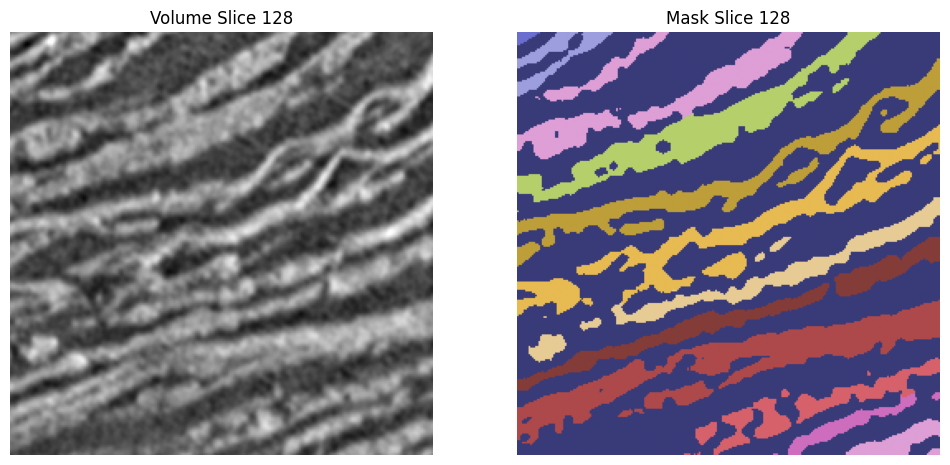

In [6]:
# Displaying the 129th slice (index 128) side by side
plt.figure(figsize=(12, 6))

# Plot the volume image
plt.subplot(1, 2, 1)
plt.imshow(volume[slice_z], cmap='gray')
plt.title(f'Volume Slice {slice_z}')
plt.axis('off')  # Hide the axis

# Plot the mask image
plt.subplot(1, 2, 2)
plt.imshow(mask[slice_z], cmap='tab20b')
plt.title(f'Mask Slice {slice_z}')
plt.axis('off')  # Hide the axis

plt.show()

Fantastic! We are visualizing different instances annotated with different labels (colors)!

We've sliced the cube in a direction that aligns somewhat with the papyrus sheet direction.
Slicing this on a different axis might show the papyrus sheets more clearly separated:

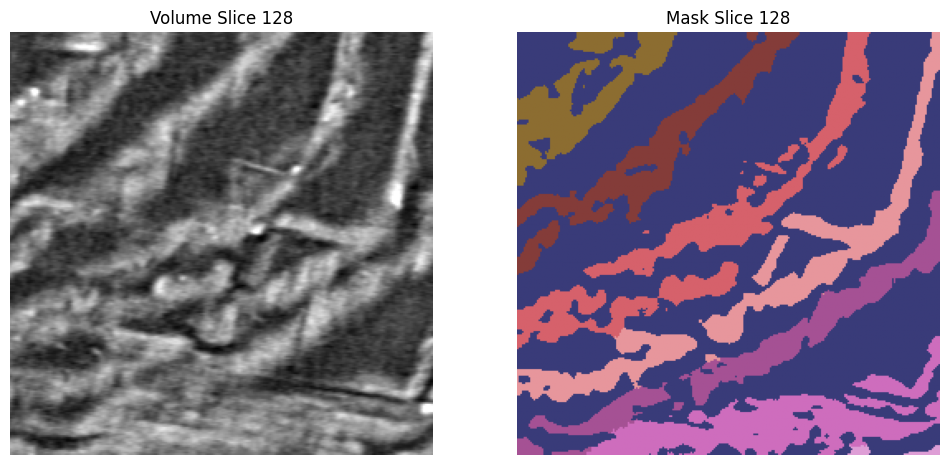

In [8]:
slice_y = 128

plt.figure(figsize=(12, 6))

# Plot the volume image
plt.subplot(1, 2, 1)
plt.imshow(volume[:, slice_y, :], cmap='gray')
plt.title(f'Volume Slice {slice_z}')
plt.axis('off')  # Hide the axis

# Plot the mask image
plt.subplot(1, 2, 2)
plt.imshow(mask[:, slice_y, :], cmap='tab20b')
plt.title(f'Mask Slice {slice_z}')
plt.axis('off')  # Hide the axis

plt.show()

😍 Beautiful. 

As a next step, you could use these volume/mask cube pairs as input to a volumetric segmentation model!